In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
csv = pd.read_csv('Resources/Project1_dataset.csv')

csv.head()

,year,state,state_abbrev,GDP,homeownership(%),unemployment_rate,population(thousands),median income,avg house data
0,1997,Alabama,AL,143646,71.3,5.0,4320,49983,191.43
1,1998,Alabama,AL,148596,72.9,4.4,4351,55997,201.27
2,1999,Alabama,AL,154094,74.8,4.7,4370,54806,206.43
3,2000,Alabama,AL,156560,73.2,4.6,4452,49989,211.62
4,2001,Alabama,AL,156404,73.2,5.1,4468,51798,223.33


In [3]:
# Minor Data Munging to Re-Format the Data Frames
gdp_pivot = csv.pivot(index='year', columns='state', values='GDP')

# Preview that Reformatting worked
gdp_pivot.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennesse,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
year,,,,,,,,,,,,,,,,,,,,,
1997,143646,42262,168551,82756,1378654,184193,190791,45231,560888,328995,...,24976,210844,872763,57700,15415,217252,193898,38840,153241,14724
1998,148596,41157,183138,84795,1470393,201076,196248,49743,590135,352713,...,26452,223769,928374,62291,16073,233096,210205,40086,162523,14928
1999,154094,40722,198096,89317,1582377,216300,202230,53862,616625,377608,...,27501,230418,965677,66023,17159,249798,230555,41831,172258,15711
2000,156560,39517,207793,90206,1709939,232752,216370,56109,642693,393195,...,29407,233153,998297,70292,18312,266886,237832,42607,180539,17205
2001,156404,40974,212656,89923,1702776,236383,220287,58882,658640,396875,...,29746,232723,1021889,73226,19274,284002,239426,43978,187939,18661


In [4]:
gdp_grouped = csv.groupby(['state'])['GDP']
avg_gdp_mean = gdp_grouped.mean()

# Convert to DataFrame
avg_gdp = pd.DataFrame(avg_gdp_mean)
avg_gdp = avg_gdp.reset_index()

# Preview DataFrame
avg_gdp = avg_gdp.sort_values(['GDP'], ascending = True)
avg_gdp.head()

,state,GDP
44,Vermont,24813.136364
49,Wyoming,30157.636364
33,North Dakota,36751.727273
40,South Dakota,37521.181818
25,Montana,38094.227273


In [5]:
#Low States
#avg_gdp['state'][:3]
#avg_gdp['GDP'][:3]

In [6]:
#High States
#avg_gdp['state'][-3:]
#avg_gdp['GDP'][-3:]

In [7]:
#Gustavo
#creating data frame from original data and selecting desired columns into new df
gus_data=pd.DataFrame(csv)
avg_unemp_grouped= gus_data.groupby(['year', 'state','homeownership(%)', 'GDP'])['unemployment_rate'].mean()
avg_unemp_df=pd.DataFrame(avg_unemp_grouped).reset_index()
avg_unemp_df.head()


,year,state,homeownership(%),GDP,unemployment_rate
0,1997,Alabama,71.3,143646,5.0
1,1997,Alaska,67.2,42262,7.1
2,1997,Arizona,63.0,168551,4.6
3,1997,Arkansas,66.7,82756,5.2
4,1997,California,55.7,1378654,6.4


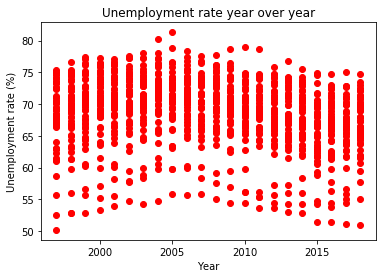

In [8]:
#creating scatter plot to show the yearly distribution of unemployment rate

x_axis=avg_unemp_df["year"]
y_axis=avg_unemp_df["homeownership(%)"]

plt.title("Unemployment rate year over year")
plt.xlabel("Year")
plt.ylabel("Unemployment rate (%)")

plt.scatter(x_axis, y_axis, marker="o", color="red")

plt.show()

In [9]:
# zData Munging to Re-Format the Data Frames
unemployment_state =avg_unemp_df.pivot(index='year', columns='state', values='unemployment_rate')
homeownership_state =avg_unemp_df.pivot(index='year', columns='state', values='homeownership(%)')



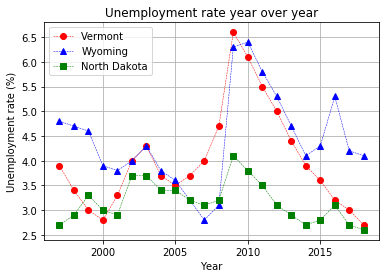

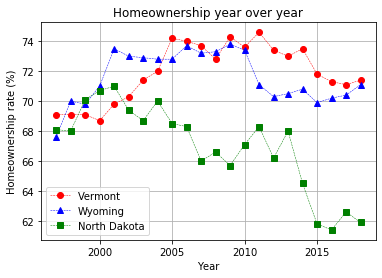

In [10]:
# Creating the plot for the yearly unemployments for 3 states with lower gdp
low_gdp_unemploy= ['Vermont', 'o', 'red'], ['Wyoming', '^', 'blue'], ['North Dakota', 's', 'green']

for state, mark, color in low_gdp_unemploy:
    unemp_plot = plt.plot(unemployment_state.index, unemployment_state[state], marker=mark, color=color, ls='--', label=state, linewidth = 0.5)
    
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Unemployment rate (%)')
plt.title('Unemployment rate year over year')
plt.grid()

plt.show()

#Creating the plot for the yearly Homeownership for 3 states with lower gdp
low_gdp_homeownership= ['Vermont', 'o', 'red'], ['Wyoming', '^', 'blue'], ['North Dakota', 's', 'green']

for state, mark, color in low_gdp_homeownership:
    home_plot = plt.plot(homeownership_state.index, homeownership_state[state], marker=mark, color=color, ls='--', label=state, linewidth = 0.5)
    
plt.legend(loc='lower left')
plt.xlabel('Year')
plt.ylabel('Homeownership rate (%)')
plt.title('Homeownership year over year')
plt.grid()

plt.show()

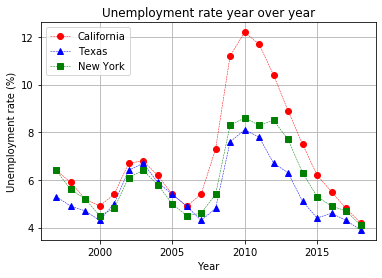

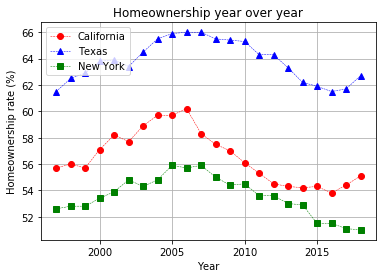

In [11]:
# Creating the plot for the yearly unemployments for 3 states with higher gdp
high_gdp_unemploy= ['California', 'o', 'red'], ['Texas', '^', 'blue'], ['New York', 's', 'green']

for state, mark, color in high_gdp_unemploy:
    unemp_plot = plt.plot(unemployment_state.index, unemployment_state[state], marker=mark, color=color, ls='--', label=state, linewidth = 0.5)
    
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Unemployment rate (%)')
plt.title('Unemployment rate year over year')
plt.grid()

plt.show()

#Creating the plot for the yearly Homeownership for 3 states with higher gdp
high_gdp_homeownership=['California', 'o', 'red'], ['Texas', '^', 'blue'], ['New York', 's', 'green']

for state, mark, color in high_gdp_homeownership:
    home_plot = plt.plot(homeownership_state.index, homeownership_state[state], marker=mark, color=color, ls='--', label=state, linewidth = 0.5)
    
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Homeownership rate (%)')
plt.title('Homeownership year over year')
plt.grid()

plt.show()



slope: 0.017639    intercept: 732.248634
R-squared: 0.964867


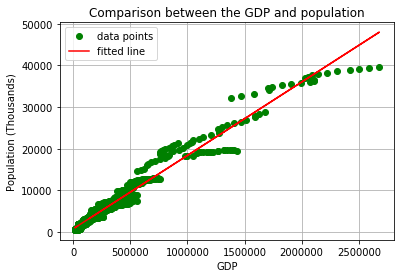

In [12]:
# Creating the plot for the biggest correlation 
gdp_x=csv["GDP"]
pop_y= csv["population(thousands)"]
slope, intercept, r_value, p_value, std_err = stats.linregress(gdp_x,pop_y)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)

plt.plot(gdp_x, pop_y, 'o',color="green", label='data points')
plt.plot(gdp_x, intercept + slope*gdp_x, 'r', label='fitted line')
plt.xlabel('GDP')
plt.ylabel('Population (Thousands)')
plt.title('Comparison between the GDP and population')
plt.grid()
plt.legend()

plt.show()


In [13]:
#David
david_data = pd.read_csv('Resources/Project1_dataset.csv')
david_data = david_data.rename(columns={'avg house data': 'avg house price (thousands)'})
david_data.head()

,year,state,state_abbrev,GDP,homeownership(%),unemployment_rate,population(thousands),median income,avg house price (thousands)
0,1997,Alabama,AL,143646,71.3,5.0,4320,49983,191.43
1,1998,Alabama,AL,148596,72.9,4.4,4351,55997,201.27
2,1999,Alabama,AL,154094,74.8,4.7,4370,54806,206.43
3,2000,Alabama,AL,156560,73.2,4.6,4452,49989,211.62
4,2001,Alabama,AL,156404,73.2,5.1,4468,51798,223.33


In [14]:
price_grouped = david_data.groupby(['year', 'GDP', 'state'])['avg house price (thousands)']
avg_price_mean = price_grouped.mean()

# Convert to DataFrame
housing_price = pd.DataFrame(avg_price_mean)
housing_price = housing_price.reset_index()

# Preview DataFrame
housing_price.head()

,year,GDP,state,avg house price (thousands)
0,1997,14724,Wyoming,138.11
1,1997,15415,Vermont,224.58
2,1997,22411,North Dakota,147.68
3,1997,24976,South Dakota,181.17
4,1997,29169,Montana,192.90


In [15]:
# Minor Data Munging to Re-Format the Data Frames
housing_price_pivot = housing_price.pivot(index='year', columns='state', values='avg house price (thousands)')

# Preview that Reformatting worked
housing_price_pivot.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennesse,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
year,,,,,,,,,,,,,,,,,,,,,
1997,191.43,158.66,173.76,167.83,206.98,210.43,228.02,237.66,178.59,197.52,...,181.17,194.19,139.49,222.34,224.58,205.92,231.56,141.19,199.47,138.11
1998,201.27,163.53,182.92,174.01,224.31,222.96,239.44,245.40,187.44,209.54,...,188.76,204.42,146.17,233.72,229.94,212.50,247.15,147.90,207.21,142.94
1999,206.43,169.21,191.93,178.33,242.29,242.28,252.28,254.79,194.77,222.32,...,195.11,211.00,154.08,236.54,239.53,221.64,260.29,150.63,217.62,146.91
2000,211.62,172.12,203.57,182.52,272.69,270.57,271.82,269.40,207.98,235.72,...,202.82,216.76,163.50,238.90,257.29,236.80,273.85,153.13,230.92,153.17
2001,223.33,180.71,217.08,192.28,307.44,295.96,295.74,289.06,228.67,252.97,...,213.57,227.32,174.38,249.28,276.91,257.21,290.65,161.50,243.06,162.00


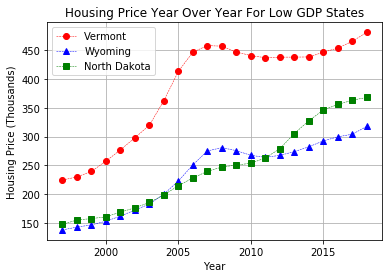

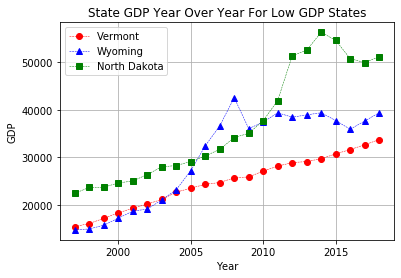

In [16]:
# Generate Housing Price Plot for Low GDP States
low_gdp_states = ['Vermont', 'o', 'red'], ['Wyoming', '^', 'blue'], ['North Dakota', 's', 'green']

for state, mark, color in low_gdp_states:
    housing_price_plot = plt.plot(housing_price_pivot.index, housing_price_pivot[state], marker=mark, color=color, ls='--', label=state, linewidth = 0.5)
    
#Aesthetics
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Housing Price (Thousands)')
plt.title('Housing Price Year Over Year For Low GDP States')
plt.grid()

plt.show()

#Generate GDP Plot for Low GDP States
low_gdp_states = ['Vermont', 'o', 'red'], ['Wyoming', '^', 'blue'], ['North Dakota', 's', 'green']

for state, mark, color in low_gdp_states:
    gdp_plot = plt.plot(gdp_pivot.index, gdp_pivot[state], marker= mark, color=color, ls='--', label=state, linewidth = 0.5)

#Aesthetics
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('State GDP Year Over Year For Low GDP States')
plt.grid()

plt.show()

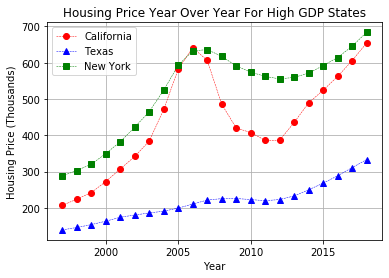

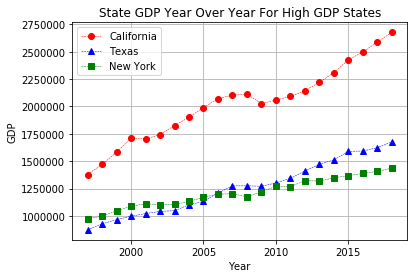

In [17]:
# Generate Housing Price Plot for High GDP States
high_gdp_states = ['California', 'o', 'red'], ['Texas', '^', 'blue'], ['New York', 's', 'green']

for state, mark, color in high_gdp_states:
    housing_price_plot = plt.plot(housing_price_pivot.index, housing_price_pivot[state], marker=mark, color=color, ls='--', label=state, linewidth = 0.5)
    
#Aesthetics
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Housing Price (Thousands)')
plt.title('Housing Price Year Over Year For High GDP States')
plt.grid()

plt.show()

#Generate GDP Plot for High GDP States
high_gdp_states = ['California', 'o', 'red'], ['Texas', '^', 'blue'], ['New York', 's', 'green']

for state, mark, color in high_gdp_states:
    gdp_plot = plt.plot(gdp_pivot.index, gdp_pivot[state], marker = mark, color=color, ls='--', label=state, linewidth = 0.5)

#Aesthetics
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('State GDP Year Over Year For High GDP States')
plt.grid()

plt.show()

In [18]:
#Erik
erik_data=pd.DataFrame(csv)
#average gdp by state
avg_state_gdp = erik_data.groupby(['state'])
avg_state_gdp = avg_state_gdp['GDP'].mean()

# Preview DataFrame
avg_state_gdp = avg_state_gdp.sort_values(ascending = True)
avg_state_gdp.head()

state
Vermont         24813.136364
Wyoming         30157.636364
North Dakota    36751.727273
South Dakota    37521.181818
Montana         38094.227273
Name: GDP, dtype: float64

In [19]:
erik_data=pd.DataFrame(csv)
#average unemployment by state
avg_state_unemp = erik_data.groupby(['state'])
avg_state_unemp = avg_state_unemp['GDP', 'unemployment_rate'].mean()
avg_state_unem = avg_state_unemp.sort_values('GDP', ascending=True)
avg_state_unem.head()

,GDP,unemployment_rate
state,,
Vermont,24813.136364,4.013636
Wyoming,30157.636364,4.413636
North Dakota,36751.727273,3.172727
South Dakota,37521.181818,3.436364
Montana,38094.227273,4.959091


In [20]:
#average homeownership % by state
avg_state_home = erik_data.groupby(['state'])
avg_state_home = avg_state_home['GDP','homeownership(%)'].mean()
avg_state_home = avg_state_home.sort_values('GDP', ascending=True)
avg_state_home.head()

,GDP,homeownership(%)
state,,
Vermont,24813.136364,71.918182
Wyoming,30157.636364,71.595455
North Dakota,36751.727273,66.950000
South Dakota,37521.181818,69.595455
Montana,38094.227273,68.809091


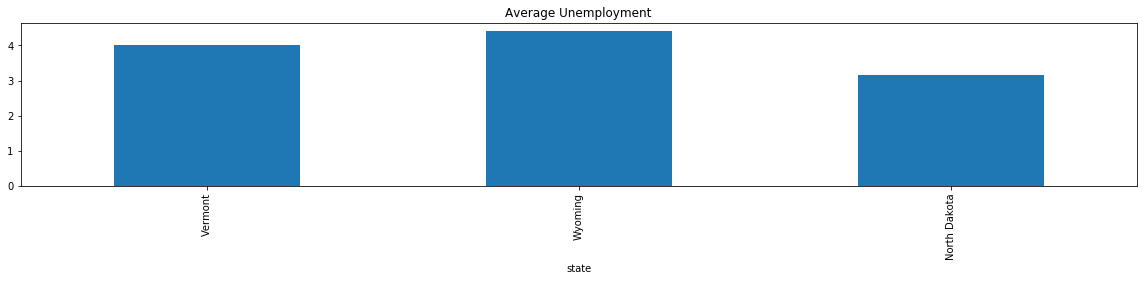

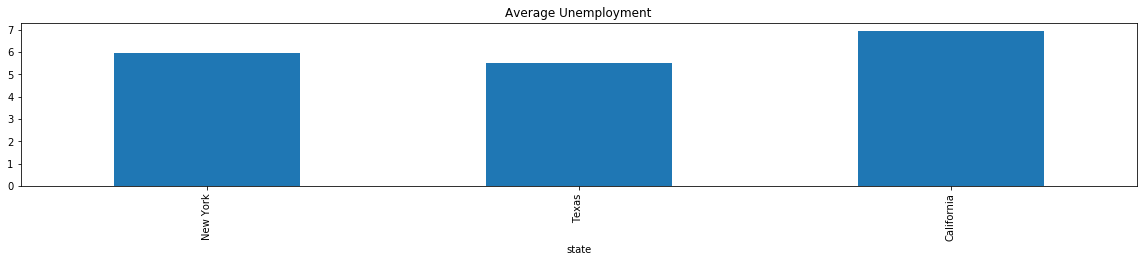

<Figure size 432x288 with 0 Axes>

In [21]:
# Use DataFrame.plot() in order to create a bar chart of the data
avg_state_unem['unemployment_rate'][:3].plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Average Unemployment")

plt.show()
plt.tight_layout()

# Use DataFrame.plot() in order to create a bar chart of the data
avg_state_unem['unemployment_rate'][-3:].plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Average Unemployment")

plt.show()
plt.tight_layout()

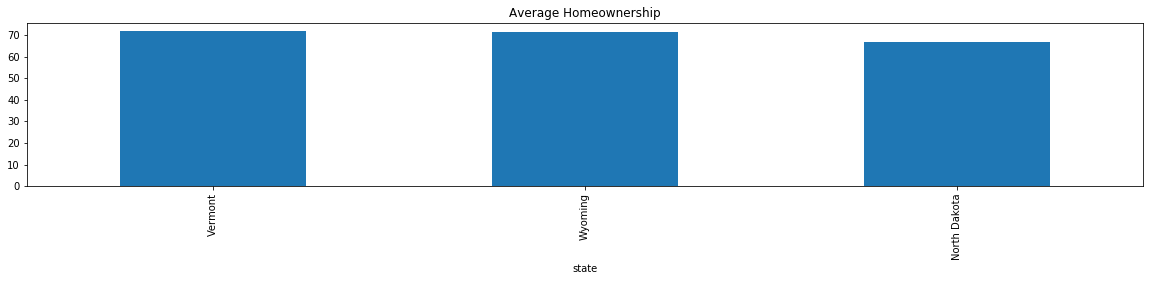

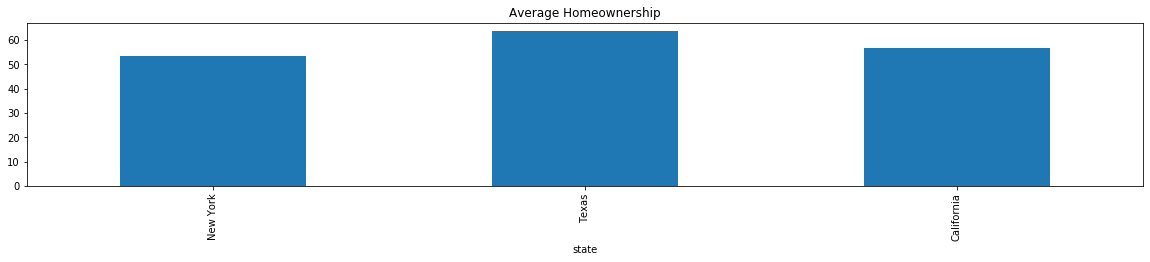

<Figure size 432x288 with 0 Axes>

In [22]:
# Use DataFrame.plot() in order to create a bar chart of the data
avg_state_home['homeownership(%)'][:3].plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Average Homeownership")

plt.show()
plt.tight_layout()

# Use DataFrame.plot() in order to create a bar chart of the data
avg_state_home['homeownership(%)'][-3:].plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Average Homeownership")

plt.show()
plt.tight_layout()

In [92]:
#Jack
jack_data = pd.read_csv("Resources/Project1_dataset.csv")
jack_data.head()

,year,state,state_abbrev,GDP,homeownership(%),unemployment_rate,population(thousands),median income,avg house data
0,1997,Alabama,AL,143646,71.30,5.00,4320,49983,191.43
1,1998,Alabama,AL,148596,72.90,4.40,4351,55997,201.27
2,1999,Alabama,AL,154094,74.80,4.70,4370,54806,206.43
3,2000,Alabama,AL,156560,73.20,4.60,4452,49989,211.62
4,2001,Alabama,AL,156404,73.20,5.10,4468,51798,223.33


In [93]:
income_grouped = jack_data.groupby(["year", "GDP", "state"])["median income"]
med_income_mean = income_grouped.mean()
med_income_mean.head()

year  GDP    state       
1997  14724  Wyoming         52306
      15415  Vermont         67226
      22411  North Dakota    60805
      24976  South Dakota    46470
      29169  Montana         45716
Name: median income, dtype: int64

In [94]:
median_income = pd.DataFrame(med_income_mean)
median_income = med_income_mean.reset_index()
median_income.head()

,year,GDP,state,median income
0,1997,14724,Wyoming,52306
1,1997,15415,Vermont,67226
2,1997,22411,North Dakota,60805
3,1997,24976,South Dakota,46470
4,1997,29169,Montana,45716


In [95]:
median_income_pivot = median_income.pivot(index = "year", columns = "state", values = "median income")
median_income_pivot.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennesse,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
year,,,,,,,,,,,,,,,,,,,,,
1997,49983,77275,40942,51237,62120,67658,68835,67345,50791,57376,...,46470,47944,54891,66941,67226,54857,69738,61965,43018,52306
1998,55997,77703,42716,57269,63204,71951,71811,64013,53901,59701,...,50623,52638,55251,68400,66941,60792,73220,63811,41232,54428
1999,54806,81556,44875,55931,65961,72837,76489,70495,54171,59605,...,54167,55216,58491,69621,69081,62869,68749,69042,44293,56314
2000,49989,78271,47400,58172,67195,70538,73363,73646,56817,61269,...,53335,50875,56456,69529,68964,57896,62182,65929,43006,57947
2001,51798,70945,43424,60715,68456,70231,74726,69495,51782,60533,...,56403,49856,58093,67309,71431,57999,60411,64471,42188,56471


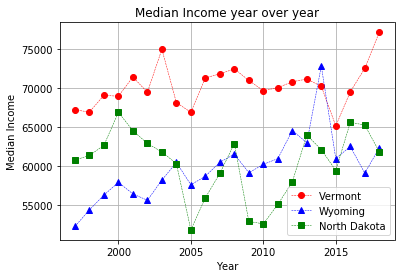

In [96]:
low_gdp_states = ['Vermont', 'o', 'red'], ['Wyoming', '^', 'blue'], ['North Dakota', 's', 'green']

for state, mark, color in low_gdp_states:
    median_income_plot = plt.plot(median_income_pivot.index, median_income_pivot[state], marker=mark, 
                                  color=color, ls='--', label=state, linewidth = 0.5)
    
#Aesthetics
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Median Income')
plt.title('Median Income year over year')
plt.grid()

plt.show()

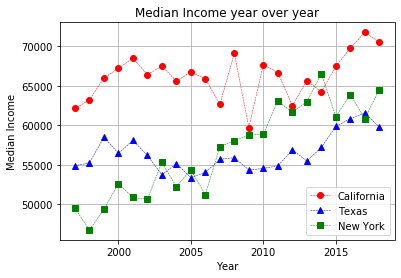

In [97]:
high_gdp_states = ['California', 'o', 'red'], ['Texas', '^', 'blue'], ['New York', 's', 'green']

for state, mark, color in high_gdp_states:
    median_income_plot = plt.plot(median_income_pivot.index, median_income_pivot[state], marker=mark, 
                                  color=color, ls='--', label=state, linewidth = 0.5)
    
#Aesthetics
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Median Income')
plt.title('Median Income year over year')
plt.grid()

plt.show()

In [98]:
homeowner_grouped = jack_data.groupby(["year", "GDP", "state"])["homeownership(%)"]
homeowner_mean = homeowner_grouped.mean()
homeowner_mean.head()

year  GDP    state       
1997  14724  Wyoming        67.60
      15415  Vermont        69.10
      22411  North Dakota   68.10
      24976  South Dakota   67.60
      29169  Montana        67.50
Name: homeownership(%), dtype: float64

In [99]:
homeownership = pd.DataFrame(homeowner_mean)
homeownership = homeownership.reset_index()
homeownership.head()

,year,GDP,state,homeownership(%)
0,1997,14724,Wyoming,67.60
1,1997,15415,Vermont,69.10
2,1997,22411,North Dakota,68.10
3,1997,24976,South Dakota,67.60
4,1997,29169,Montana,67.50


In [100]:
homeownership_pivot = homeownership.pivot(index = "year", columns = "state", values = "homeownership(%)")
homeownership_pivot.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennesse,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
year,,,,,,,,,,,,,,,,,,,,,
1997,71.30,67.20,63.00,66.70,55.70,64.10,68.10,69.20,66.90,70.90,...,67.60,70.20,61.50,72.50,69.10,68.40,62.90,74.60,68.30,67.60
1998,72.90,66.30,64.30,66.70,56.00,65.20,69.30,71.00,66.90,71.20,...,67.30,71.30,62.50,73.70,69.10,69.40,64.90,74.80,70.10,70.00
1999,74.80,66.40,66.30,65.60,55.70,68.10,69.10,71.60,67.60,71.30,...,70.70,71.90,62.90,74.70,69.10,71.20,64.80,74.80,70.90,69.80
2000,73.20,66.40,68.00,68.90,57.10,68.30,70.00,72.00,68.40,69.80,...,71.20,70.90,63.80,72.70,68.70,73.90,63.60,75.90,71.80,71.00
2001,73.20,65.30,68.10,71.20,58.20,68.50,71.80,75.40,69.20,70.10,...,71.50,69.70,63.90,72.40,69.80,75.10,66.40,76.40,72.30,73.50


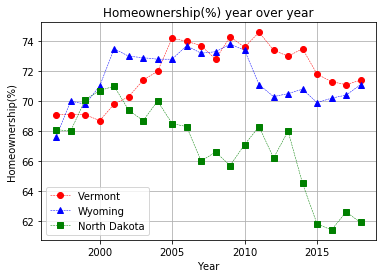

In [101]:
low_gdp_states = ['Vermont', 'o', 'red'], ['Wyoming', '^', 'blue'], ['North Dakota', 's', 'green']

for state, mark, color in low_gdp_states:
    homeownership_plot = plt.plot(homeownership_pivot.index, homeownership_pivot[state], marker=mark, 
                                  color=color, ls='--', label=state, linewidth = 0.5)
    
#Aesthetics
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Homeownership(%)')
plt.title('Homeownership(%) year over year')
plt.grid()

plt.show()

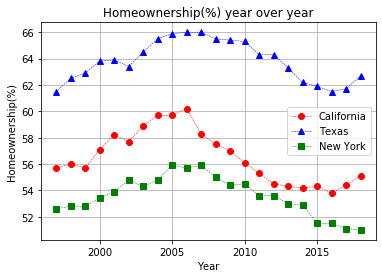

In [102]:
high_gdp_states = ['California', 'o', 'red'], ['Texas', '^', 'blue'], ['New York', 's', 'green']

for state, mark, color in high_gdp_states:
    homeownership_plot = plt.plot(homeownership_pivot.index, homeownership_pivot[state], marker=mark, 
                                  color=color, ls='--', label=state, linewidth = 0.5)
    
#Aesthetics
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Homeownership(%)')
plt.title('Homeownership(%) year over year')
plt.grid()

plt.show()

In [147]:
x = jack_data["GDP"]
y = jack_data["median income"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: -0.001318    intercept: 60047.282245


In [148]:
print("R-squared: %f" % r_value**2)

R-squared: 0.002754


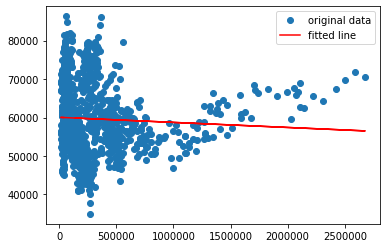

In [149]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

In [106]:
csv.head()

,year,state,state_abbrev,GDP,homeownership(%),unemployment_rate,population(thousands),median income,avg house data
0,1997,Alabama,AL,143646,71.30,5.00,4320,49983,191.43
1,1998,Alabama,AL,148596,72.90,4.40,4351,55997,201.27
2,1999,Alabama,AL,154094,74.80,4.70,4370,54806,206.43
3,2000,Alabama,AL,156560,73.20,4.60,4452,49989,211.62
4,2001,Alabama,AL,156404,73.20,5.10,4468,51798,223.33


In [107]:
csv_data = csv[["GDP", "homeownership(%)", "unemployment_rate", "population(thousands)", 
                "median income", "avg house data"]].copy()
csv_data.head()

,GDP,homeownership(%),unemployment_rate,population(thousands),median income,avg house data
0,143646,71.30,5.00,4320,49983,191.43
1,148596,72.90,4.40,4351,55997,201.27
2,154094,74.80,4.70,4370,54806,206.43
3,156560,73.20,4.60,4452,49989,211.62
4,156404,73.20,5.10,4468,51798,223.33


In [108]:
csv_data.describe()

,GDP,homeownership(%),unemployment_rate,population(thousands),median income,avg house data
count,"1,100.00","1,100.00","1,100.00","1,100.00","1,100.00","1,100.00"
mean,"298,982.95",68.72,5.42,"6,005.92","59,653.09",312.33
std,"369,931.62",5.24,1.93,"6,642.84","9,293.39",110.88
min,"14,724.00",50.20,2.30,480.00,"34,916.00",128.77
25%,"70,935.75",66.10,4.10,"1,747.75","52,878.00",234.61
50%,"182,700.50",69.60,5.00,"4,263.50","58,775.00",286.00
75%,"363,024.75",72.40,6.40,"6,828.00","65,932.50",371.68
max,"2,677,939.00",81.30,13.70,"39,557.00","86,345.00",794.83


In [109]:
pd.options.display.float_format = '{:,.2f}'.format
csv_data.describe()

,GDP,homeownership(%),unemployment_rate,population(thousands),median income,avg house data
count,"1,100.00","1,100.00","1,100.00","1,100.00","1,100.00","1,100.00"
mean,"298,982.95",68.72,5.42,"6,005.92","59,653.09",312.33
std,"369,931.62",5.24,1.93,"6,642.84","9,293.39",110.88
min,"14,724.00",50.20,2.30,480.00,"34,916.00",128.77
25%,"70,935.75",66.10,4.10,"1,747.75","52,878.00",234.61
50%,"182,700.50",69.60,5.00,"4,263.50","58,775.00",286.00
75%,"363,024.75",72.40,6.40,"6,828.00","65,932.50",371.68
max,"2,677,939.00",81.30,13.70,"39,557.00","86,345.00",794.83


In [110]:
gdp_pivot = csv.pivot(index='year', columns='state', values='GDP')
gdp_pivot.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennesse,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
year,,,,,,,,,,,,,,,,,,,,,
1997,143646,42262,168551,82756,1378654,184193,190791,45231,560888,328995,...,24976,210844,872763,57700,15415,217252,193898,38840,153241,14724
1998,148596,41157,183138,84795,1470393,201076,196248,49743,590135,352713,...,26452,223769,928374,62291,16073,233096,210205,40086,162523,14928
1999,154094,40722,198096,89317,1582377,216300,202230,53862,616625,377608,...,27501,230418,965677,66023,17159,249798,230555,41831,172258,15711
2000,156560,39517,207793,90206,1709939,232752,216370,56109,642693,393195,...,29407,233153,998297,70292,18312,266886,237832,42607,180539,17205
2001,156404,40974,212656,89923,1702776,236383,220287,58882,658640,396875,...,29746,232723,1021889,73226,19274,284002,239426,43978,187939,18661


In [111]:
homeownership_pivot = csv.pivot(index = "year", columns = "state", values = "homeownership(%)")
homeownership_pivot.head()

state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennesse,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
year,,,,,,,,,,,,,,,,,,,,,
1997,71.30,67.20,63.00,66.70,55.70,64.10,68.10,69.20,66.90,70.90,...,67.60,70.20,61.50,72.50,69.10,68.40,62.90,74.60,68.30,67.60
1998,72.90,66.30,64.30,66.70,56.00,65.20,69.30,71.00,66.90,71.20,...,67.30,71.30,62.50,73.70,69.10,69.40,64.90,74.80,70.10,70.00
1999,74.80,66.40,66.30,65.60,55.70,68.10,69.10,71.60,67.60,71.30,...,70.70,71.90,62.90,74.70,69.10,71.20,64.80,74.80,70.90,69.80
2000,73.20,66.40,68.00,68.90,57.10,68.30,70.00,72.00,68.40,69.80,...,71.20,70.90,63.80,72.70,68.70,73.90,63.60,75.90,71.80,71.00
2001,73.20,65.30,68.10,71.20,58.20,68.50,71.80,75.40,69.20,70.10,...,71.50,69.70,63.90,72.40,69.80,75.10,66.40,76.40,72.30,73.50


In [112]:
gdp_pivot_tran = gdp_pivot.transpose()
gdp_pivot_tran.head()

year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
state,,,,,,,,,,,,,,,,,,,,,
Alabama,143646,148596,154094,156560,156404,160870,164992,175508,181386,184796,...,178021,182263,185055,186299,188165,186335,188716,189614,193053,196876
Alaska,42262,41157,40722,39517,40974,42881,42151,43735,45052,48517,...,55838,54151,54646,57670,54750,53209,53585,52608,52492,52311
Arizona,168551,183138,198096,207793,212656,219311,233342,243246,263061,277288,...,255081,257485,263211,268289,270149,273407,279435,288682,297210,309067
Arkansas,82756,84795,89317,90206,89923,92885,96545,101210,104653,106940,...,102528,105923,108295,108745,111779,112706,113177,113788,114851,115933
California,1378654,1470393,1582377,1709939,1702776,1743651,1825424,1902319,1990141,2072177,...,2026487,2058138,2091586,2144497,2220868,2309928,2426143,2498840,2587572,2677939


In [113]:
homeownership_pivot_tran = homeownership_pivot.transpose()
homeownership_pivot_tran.head()

year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
state,,,,,,,,,,,,,,,,,,,,,
Alabama,71.30,72.90,74.80,73.20,73.20,73.70,76.20,78.00,76.60,74.20,...,74.10,73.20,72.90,71.90,72.70,72.10,70.00,69.70,70.00,70.30
Alaska,67.20,66.30,66.40,66.40,65.30,67.10,70.00,67.20,66.00,67.20,...,66.80,65.70,64.40,63.70,64.60,64.90,62.30,65.20,65.50,63.70
Arizona,63.00,64.30,66.30,68.00,68.10,65.60,67.00,68.70,71.10,71.60,...,68.90,66.60,66.00,65.30,65.10,63.50,61.70,61.90,64.40,65.70
Arkansas,66.70,66.70,65.60,68.90,71.20,70.30,69.60,69.10,69.20,70.80,...,68.50,67.90,67.60,66.00,65.40,65.40,67.10,67.60,65.00,64.70
California,55.70,56.00,55.70,57.10,58.20,57.70,58.90,59.70,59.70,60.20,...,57.00,56.10,55.30,54.50,54.30,54.20,54.30,53.80,54.40,55.10


In [114]:
#linear regression for all states for year 1997 and 2018
x = gdp_pivot_tran[1997]
y = homeownership_pivot_tran[1997]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: -0.000008    intercept: 69.467972


In [115]:
print("R-squared: %f" % r_value**2)

R-squared: 0.148469


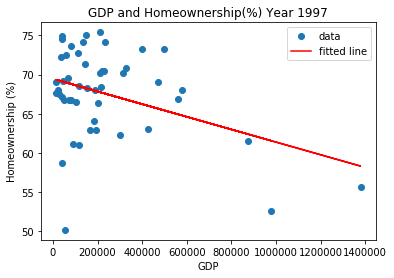

In [116]:
plt.plot(x, y, 'o', label='data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.title("GDP and Homeownership(%) Year 1997")
plt.xlabel("GDP")
plt.ylabel("Homeownership (%)")
plt.legend()
plt.show()

In [117]:
x2 = gdp_pivot_tran[2018]
y2 = homeownership_pivot_tran[2018]
slope, intercept, r_value, p_value, std_err = stats.linregress(x2, y2)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: -0.000005    intercept: 68.663734


In [118]:
print("R-squared: %f" % r_value**2)

R-squared: 0.285636


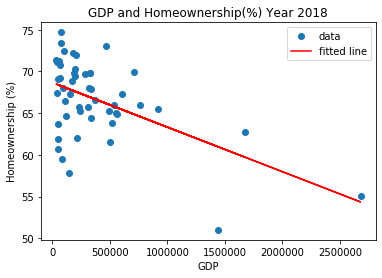

In [119]:
plt.plot(x2, y2, 'o', label='data')
plt.plot(x2, intercept + slope*x2, 'r', label='fitted line')
plt.title("GDP and Homeownership(%) Year 2018")
plt.xlabel("GDP")
plt.ylabel("Homeownership (%)")
plt.legend()
plt.show()

In [120]:
x3 = gdp_pivot_tran[2007]
y3 = homeownership_pivot_tran[2007]
slope, intercept, r_value, p_value, std_err = stats.linregress(x3, y3)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: -0.000006    intercept: 71.866333


In [121]:
print("R-squared: %f" % r_value**2)

R-squared: 0.237490


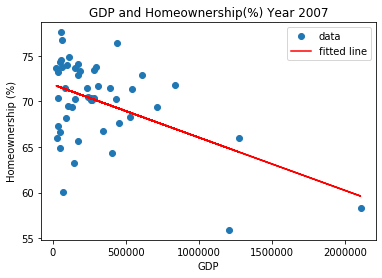

In [122]:
plt.plot(x3, y3, 'o', label='data')
plt.plot(x3, intercept + slope*x3, 'r', label='fitted line')
plt.title("GDP and Homeownership(%) Year 2007")
plt.xlabel("GDP")
plt.ylabel("Homeownership (%)")
plt.legend()
plt.show()

In [123]:
x4 = gdp_pivot["California"]
y4 = homeownership_pivot["California"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x4, y4)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: -0.000002    intercept: 61.466515


In [124]:
print("R-squared: %f" % r_value**2)
print("p-value: %f" % p_value)

R-squared: 0.177290
p-value: 0.051000


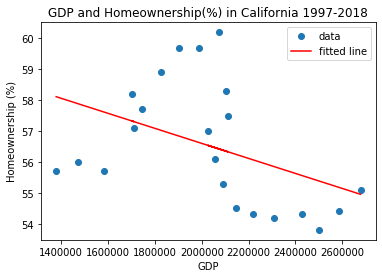

In [125]:
plt.plot(x4, y4, 'o', label='data')
plt.plot(x4, intercept + slope*x4, 'r', label='fitted line')
plt.title("GDP and Homeownership(%) in California 1997-2018")
plt.xlabel("GDP")
plt.ylabel("Homeownership (%)")
plt.legend()
plt.show()

In [126]:
x5 = gdp_pivot["Texas"]
y5 = homeownership_pivot["Texas"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x5, y5)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: -0.000002    intercept: 65.802931


In [127]:
print("R-squared: %f" % r_value**2)
print("p-value: %f" % p_value)

R-squared: 0.062314
p-value: 0.262560


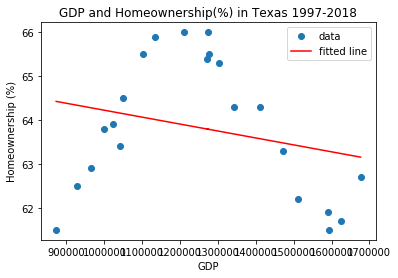

In [128]:
plt.plot(x5, y5, 'o', label='data')
plt.plot(x5, intercept + slope*x5, 'r', label='fitted line')
plt.title("GDP and Homeownership(%) in Texas 1997-2018")
plt.xlabel("GDP")
plt.ylabel("Homeownership (%)")
plt.legend()
plt.show()

In [129]:
x6 = gdp_pivot["New York"]
y6 = homeownership_pivot["New York"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x6, y6)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: -0.000005    intercept: 59.431315


In [130]:
print("R-squared: %f" % r_value**2)
print("p-value: %f" % p_value)

R-squared: 0.188488
p-value: 0.043500


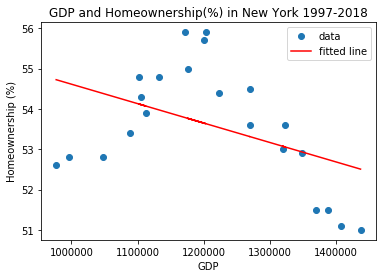

In [131]:
plt.plot(x6, y6, 'o', label='data')
plt.plot(x6, intercept + slope*x6, 'r', label='fitted line')
plt.title("GDP and Homeownership(%) in New York 1997-2018")
plt.xlabel("GDP")
plt.ylabel("Homeownership (%)")
plt.legend()
plt.show()

In [132]:
x7 = gdp_pivot["Vermont"]
y7 = homeownership_pivot["Vermont"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x7, y7)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: 0.000202    intercept: 66.895472


In [133]:
print("R-squared: %f" % r_value**2)
print("p-value: %f" % p_value)

R-squared: 0.334761
p-value: 0.004788


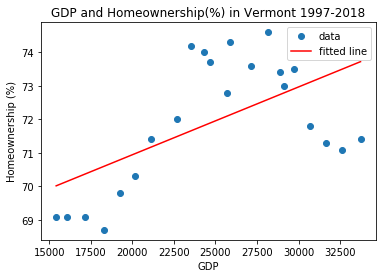

In [134]:
plt.plot(x7, y7, 'o', label='data')
plt.plot(x7, intercept + slope*x7, 'r', label='fitted line')
plt.title("GDP and Homeownership(%) in Vermont 1997-2018")
plt.xlabel("GDP")
plt.ylabel("Homeownership (%)")
plt.legend()
plt.show()

In [135]:
x8 = gdp_pivot["Wyoming"]
y8 = homeownership_pivot["Wyoming"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x8, y8)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: 0.000026    intercept: 70.811250


In [136]:
print("R-squared: %f" % r_value**2)
print("p-value: %f" % p_value)

R-squared: 0.023162
p-value: 0.498957


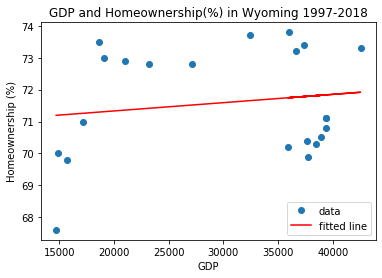

In [137]:
plt.plot(x8, y8, 'o', label='data')
plt.plot(x8, intercept + slope*x8, 'r', label='fitted line')
plt.title("GDP and Homeownership(%) in Wyoming 1997-2018")
plt.xlabel("GDP")
plt.ylabel("Homeownership (%)")
plt.legend()
plt.show()

In [138]:
x9 = gdp_pivot["North Dakota"]
y9 = homeownership_pivot["North Dakota"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x9, y9)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: -0.000193    intercept: 74.056012


In [139]:
print("R-squared: %f" % r_value**2)
print("p-value: %f" % p_value)

R-squared: 0.624131
p-value: 0.000012


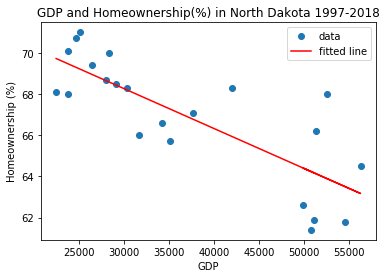

In [140]:
plt.plot(x9, y9, 'o', label='data')
plt.plot(x9, intercept + slope*x9, 'r', label='fitted line')
plt.title("GDP and Homeownership(%) in North Dakota 1997-2018")
plt.xlabel("GDP")
plt.ylabel("Homeownership (%)")
plt.legend()
plt.show()

In [141]:
x10 = csv["population(thousands)"]
y10 = csv["homeownership(%)"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x10, y10)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: -0.000323    intercept: 70.661077


In [142]:
print("R-squared: %f" % r_value**2)
print("p-value:%f" % p_value)

R-squared: 0.167275
p-value:0.000000


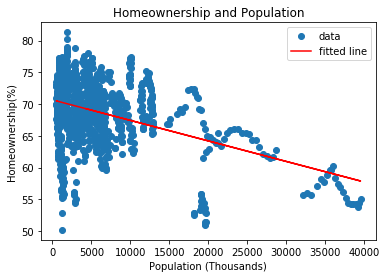

In [143]:
plt.plot(x10, y10, 'o', label='data')
plt.plot(x10, intercept + slope*x10, 'r', label='fitted line')
plt.title("Homeownership and Population")
plt.xlabel("Population (Thousands)")
plt.ylabel("Homeownership(%)")
plt.legend()
plt.show()

In [144]:
x11 = csv["avg house data"]
y11 = csv["homeownership(%)"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x11, y11)
print("slope: %f    intercept: %f" % (slope, intercept))

slope: -0.017029    intercept: 74.041632


In [145]:
print("R-squared: %f" % r_value**2)
print("p-value:%f" % p_value)

R-squared: 0.129775
p-value:0.000000


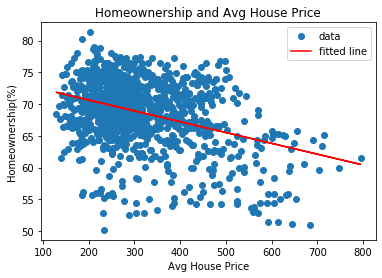

In [146]:
plt.plot(x11, y11, 'o', label='data')
plt.plot(x11, intercept + slope*x11, 'r', label='fitted line')
plt.title("Homeownership and Avg House Price")
plt.xlabel("Avg House Price")
plt.ylabel("Homeownership(%)")
plt.legend()
plt.show()